# Crypto Volatility Prediction — Submission Pack

This document contains everything you need to prepare the GitHub repository or zipped folder required for submission:
- recommended repository structure
- README template
- HLD & LLD templates
- Pipeline architecture description (text + ascii diagram)
- Final report template
- `requirements.txt` & `.gitignore` suggestions
- Packaging & submission checklist

---

## 1) Recommended repository layout

```
crypto-volatility-project/
├── data/                      # small sample data or pointers (do not include large raw datasets)
│   ├── sample_crypto.csv
│   └── README.md              # data source, fields, size
├── notebooks/                 # EDA & experiments (ipynb)
│   ├── 01_EDA.ipynb
│   └── 02_feature_engineering.ipynb
├── src/                       # main source code (python modules)
│   ├── __init__.py
│   ├── data_preprocessing.py
│   ├── features.py
│   ├── models.py
│   ├── train.py
│   ├── evaluate.py
│   └── inference.py           # script to load model & predict
├── models/                    # saved model artifacts (small sample or pointers)
│   └── rf_baseline.pkl
├── docs/
│   ├── HLD.md
│   ├── LLD.md
│   └── pipeline_architecture.md
├── reports/
│   ├── EDA_report.pdf
│   └── final_report.md
├── requirements.txt
├── .gitignore
├── README.md
└── submission_instructions.md
```

> Note: Do **not** commit large raw datasets or sensitive credentials. Instead include a `data/README.md` that explains how to download or recreate the dataset, or include a small sample CSV.

---

## 2) README.md (Template)

```
# Cryptocurrency Volatility Prediction

Short description: Predict short-term realized volatility for cryptocurrencies using historical OHLC + volume + market cap.

## Repository structure
(briefly describe the layout)

## How to run
1. Create a virtual environment
   ```bash
   python -m venv venv
   source venv/bin/activate  # or venv\Scripts\activate on Windows
   pip install -r requirements.txt
   ```
2. Preprocess data
   ```bash
   python src/data_preprocessing.py --input data/sample_crypto.csv --out data/processed.csv
   ```
3. Train model (example)
   ```bash
   python src/train.py --config configs/train_config.yaml
   ```
4. Evaluate
   ```bash
   python src/evaluate.py --model models/rf_baseline.pkl --data data/test.csv
   ```

## Deliverables
- Model: `models/rf_baseline.pkl`
- EDA: `reports/EDA_report.pdf`
- HLD & LLD: `docs/HLD.md`, `docs/LLD.md`
- Final report: `reports/final_report.md`

## Author
Your name, contact info
```

---

## 3) HLD.md — High-Level Design (Template)

```
# High-Level Design (HLD)

## Project Overview
Short summary of goals and scope.

## System Components
1. Data Ingestion
   - Source: CSV / API (e.g., CoinGecko / Kaggle)
   - Frequency: daily
2. Data Storage
   - Local files or cloud object store (S3)
3. Preprocessing & Feature Engineering
   - Scripts: `src/data_preprocessing.py`, `src/features.py`
4. Modeling
   - Baseline: RandomForest
   - Time-series: GARCH / SARIMAX (optional)
5. Serving / Inference
   - Simple Flask or Streamlit app in `src/inference.py`

## Data Flow
Describe flow: raw data → preprocessing → feature store → train → model artifact → inference

## Non-functional Requirements
- Runtime constraints
- Scalability
- Logging and monitoring
```

---

## 4) LLD.md — Low-Level Design (Template)

```
# Low-Level Design (LLD)

## Modules & Files
### src/data_preprocessing.py
- Functions:
  - `load_data(path)` → DataFrame
  - `clean_data(df)` → fill/forward/backfill missing values, drop duplicates
  - `save_processed(df, path)`

### src/features.py
- `compute_returns(df)`
- `rolling_features(df, windows=[7,14,30])`
- `technical_indicators(df)` → Bollinger Bands, ATR, RSI (optional)

### src/models.py
- `train_rf(X,y)` → returns fitted model
- `train_sarimax(endog, exog, order, seasonal_order)` → returns results

### src/train.py
- CLI or config-driven script. Reads processed data, trains model, saves artifact.

### src/evaluate.py
- Compute RMSE, MAE, R2. Produce plots and save `reports/`.

## Configurations
- `configs/train_config.yaml` (learning params, feature list, seed)

## Artifacts
- Model pickle, scaler, feature metadata JSON
```

---

## 5) Pipeline Architecture (text + ascii)

**Short text:**
1. Ingest raw daily OHLC+volume+marketcap
2. Clean & normalize
3. Feature engineering (returns, rolling vol, liquidity ratios, indicators)
4. Split time-series train/val/test using walk-forward
5. Train baseline ML model + time-series model(s)
6. Evaluate & compare
7. Package model & prepare inference script

**Simple ASCII diagram:**

```
RAW DATA --> Preprocessing --> Feature Store --> Training (RF / SARIMAX / GARCH) --> Evaluation --> Model Artifact --> Inference/API
```

---

## 6) Final Report Template (reports/final_report.md)

```
# Final Report

## Executive Summary
- One-paragraph summary of goals, approach, and key results.

## Data Overview
- Source, size, key fields, cleaning steps.

## Feature Engineering
- List of engineered features and motivation.

## Models Tried
- Baseline (RandomForest): performance
- Time-series (SARIMAX/GARCH): performance
- Any neural approaches (optional)

## Results
- Tables of metrics (RMSE, MAE, R²)
- Example plots (true vs predicted volatility)

## Conclusion & Next Steps
- Improvements, deployment notes, caveats
```

---

## 7) requirements.txt (example)

```
pandas
numpy
scikit-learn
matplotlib
statsmodels
joblib
streamlit
flask
pyyaml
```

---

## 8) .gitignore (suggestion)

```
__pycache__/
*.pyc
.env
venv/
models/*.pkl
data/raw/
.DS_Store
.ipynb_checkpoints/
```

---

## 9) Packaging & Submission Checklist

- [ ] README.md filled
- [ ] `src/` contains scripts with docstrings
- [ ] `notebooks/` contains EDA notebooks (with outputs cleared if needed)
- [ ] `docs/HLD.md` and `docs/LLD.md` completed
- [ ] `reports/EDA_report.pdf` and `reports/final_report.md` present
- [ ] `requirements.txt` present
- [ ] Small sample data in `data/` or data download instructions
- [ ] `submission_instructions.md` describing how to run the code and reproduce results
- [ ] Zip the repo or push to GitHub and share link

**Zip command:**
```bash
zip -r crypto-volatility-project.zip crypto-volatility-project/
```

**Git push (quick):**
```bash
git init
git add .
git commit -m "Initial commit - project submission"
git branch -M main
git remote add origin <your-github-repo-URL>
git push -u origin main
```

---

## 10) Helpful templates & snippets (quick copy)

- `src/train.py` (skeleton)

```python
import argparse
import pandas as pd
from src.models import train_rf

if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('--data', type=str, required=True)
    args = parser.parse_args()

    df = pd.read_csv(args.data, parse_dates=['date'])
    # preprocessing, feature engineering ...
    X, y = ..., ...
    model = train_rf(X, y)
    model.save('models/rf_baseline.pkl')
```

---

If you want, I can now:
- generate filled `HLD.md` and `LLD.md` tailored to your uploaded PDF project statement, or
- create a ready-to-download zip with a scaffolded repository (code skeleton + templates).

Tell me which one you want me to create next and I will scaffold it for you.



        date symbol        open         high         low        close  \
0 2023-01-01    BTC  222.603643  1009.192205  367.705626   337.546857   
1 2023-01-02    BTC   46.195790   413.464290  815.785271  1044.125714   
2 2023-01-03    BTC  408.058503   184.515511   37.577684   995.586878   
3 2023-01-04    BTC  834.330566   950.660595  422.956024   150.950353   
4 2023-01-05    BTC  931.976181   686.563886  301.805994   387.668675   

         volume    market_cap  
0  68713.476253  8.809832e+06  
1  55818.199215  8.236149e+06  
2  87786.168736  4.199671e+07  
3  85967.671976  3.547583e+07  
4  23255.615342  2.943999e+07  


/tmp/ipython-input-3299495768.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("symbol").apply(add_features)
/tmp/ipython-input-3299495768.py:40: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)
/tmp/ipython-input-3299495768.py:41: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


RMSE: 0.2189
MAE : 0.1699
R²  : 0.7229


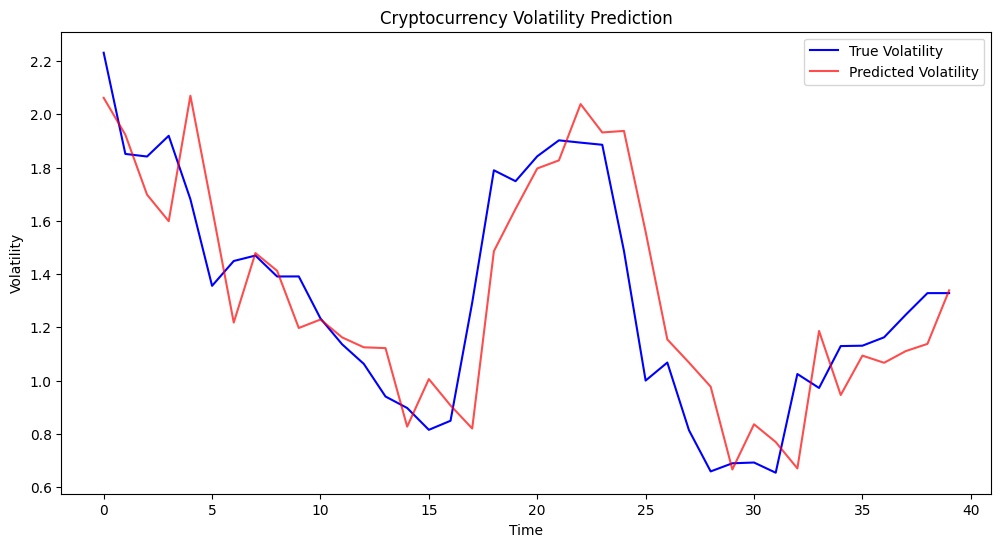

In [14]:
# Sample Python Pipeline for Cryptocurrency Volatility Prediction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


df = pd.read_csv("crypto_data.csv", parse_dates=["date"])
df.sort_values(["symbol", "date"], inplace=True)

print(df.head())


def add_features(data):
    data = data.copy()

    data["log_return"] = np.log(data["close"] / data["close"].shift(1))

    data["rolling_volatility"] = data["log_return"].rolling(window=7).std()

    data["ma_7"] = data["close"].rolling(window=7).mean()
    data["ma_30"] = data["close"].rolling(window=30).mean()

    data["liquidity_ratio"] = (data["volume"] / data["market_cap"])

    data["target_volatility"] = data["log_return"].rolling(window=7).std().shift(-1)


    return data

df = df.groupby("symbol").apply(add_features)

df.fillna(method='bfill', inplace=True)
df.fillna(method='ffill', inplace=True)
df.dropna(inplace=True)

if df.empty:
    raise ValueError("DataFrame is empty after feature engineering and dropping NaNs. The data might be too short for the chosen window sizes or there are too many missing values.")



features = ["log_return", "rolling_volatility", "ma_7", "ma_30", "liquidity_ratio", "volume", "market_cap"]
X = df[features]
y = df["target_volatility"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="True Volatility", color="blue")
plt.plot(y_pred, label="Predicted Volatility", color="red", alpha=0.7)
plt.title("Cryptocurrency Volatility Prediction")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.legend()
plt.show()

In [12]:
# Create a dummy crypto_data.csv file for demonstration purposes
import pandas as pd
import numpy as np

n_days = 100

data = {
    'date': pd.to_datetime(pd.date_range(start='2023-01-01', periods=n_days).tolist() * 2),
    'symbol': ['BTC'] * n_days + ['ETH'] * n_days,
    'open': np.random.rand(n_days * 2) * 1000,
    'high': np.random.rand(n_days * 2) * 1100,
    'low': np.random.rand(n_days * 2) * 900,
    'close': np.random.rand(n_days * 2) * 1050,
    'volume': np.random.rand(n_days * 2) * 100000,
    'market_cap': np.random.rand(n_days * 2) * 50000000
}

dummy_df = pd.DataFrame(data)
dummy_df.to_csv('crypto_data.csv', index=False)